<a href="https://colab.research.google.com/github/Swap1984/swapnil/blob/main/Assignment_Word2Vec_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word2Vec: embedding








# Definition, Advantages and Disadvantages of Word2Vec

**Definition**

Word2Vec is a popular word embedding technique that converts words into numerical vectors, typically of fixed size, which capture semantic meaning and relationships between words. It’s based on the idea that words used in similar contexts tend to have similar meanings.

Word2Vec is a popular word embedding technique that converts words into numerical vectors, typically of fixed size, which capture semantic meaning and relationships between words. It’s based on the idea that words used in similar contexts tend to have similar meanings.

**How Word2Vec Works:**

Word2Vec relies on two primary architectures for learning word representations:

Continuous Bag of Words (CBOW):

Predicts the current word based on the context (neighboring words).
Focuses on using surrounding words to predict the target word.

Skip-Gram:

Predicts surrounding words based on the current word.
Focuses on using the target word to predict surrounding words.
Both models output word vectors where words with similar meanings are represented by vectors that are close to each other in the vector space.

**Why Word2Vec is Used:**

Word2Vec is used to overcome the limitations of traditional approaches like Bag of Words (BoW) or TF-IDF, which:

Do not capture the semantic relationships between words.
Result in sparse, high-dimensional vectors.
Treat words as isolated units without considering word meaning or relationships (e.g., "king" and "queen" are treated as entirely distinct words).
Word2Vec, on the other hand, creates dense, low-dimensional embeddings where semantically similar words (like “king” and “queen”) are close to each other in the vector space.

**Key Advantages of Word2Vec:**

Captures Semantic Meaning:

Word2Vec captures relationships between words. For instance, "king" and "queen" might have vectors that are similar, and relationships like king – man + woman = queen can be inferred through vector arithmetic.

Efficient Representation:

Instead of large, sparse vectors (like in BoW), Word2Vec generates dense, fixed-length vectors that efficiently encode word meaning.

Contextual Understanding:

Words that appear in similar contexts tend to have similar vectors. This allows Word2Vec to capture word meanings based on how they are used in sentences.

Ability to Perform Analogies:

Word2Vec allows vector arithmetic, so relationships like Paris – France + Germany = Berlin can be inferred by manipulating the word vectors.

Scalable and Efficient:

Word2Vec can be trained on large datasets efficiently, and the learned embeddings can be used across different tasks.

Dimensionality Reduction:

Word2Vec provides low-dimensional vectors (typically 100–300 dimensions), which can be used as input for downstream NLP tasks like text classification, clustering, or sentiment analysis.

**Limitations of Traditional Methods:**

Bag of Words:

Only counts word occurrences; doesn't consider word order or context.
High dimensionality and sparsity.
Fails to capture the meaning of words.

TF-IDF:

Weighs word importance but still ignores word order and meaning.
Does not capture relationships between words.

**Applications of Word2Vec:**
Text Classification:
The dense vectors can be used as input for machine learning models for tasks like sentiment analysis or spam detection.

Document Similarity: Word vectors help in calculating document similarity by comparing the vector representations of words.

Machine Translation: The embeddings can help translate words from one language to another by capturing word relationships.

Recommendation Systems: By using vector similarities, Word2Vec can recommend similar items based on text descriptions or user interactions.

Word2Vec is a powerful word embedding technique that generates dense, fixed-length vectors, capturing the semantic and syntactic properties of words based on the contexts in which they appear.
It’s widely used because of its ability to capture word meaning, its efficiency, and its ability to handle large-scale text data effectively.


#**Preprocessing data for Word2Vec**

 Word2Vec has a different approach to processing text compared to methods like Bag of Words (BoW) or TF-IDF, which rely heavily on explicit preprocessing steps such as punctuation removal, lemmatization, and stopword filtering.

 In traditional approaches like BoW or TF-IDF, removing punctuation is essential to avoid treating punctuation as "words."In Word2Vec, the model learns semantic relationships between words by predicting them from the context. It generally doesn't need to strip punctuation explicitly if the corpus is already clean and the punctuation marks aren't significant. We might still clean the text, but it’s not strictly required as part of the Word2Vec process.

For BoW or TF-IDF, removing stopwords is often useful to reduce the dimensionality of the vectors (since common words like "the", "and", etc., don't contribute much to the meaning).In Word2Vec, stopwords can be useful because they still provide context for the words in a sentence. Since Word2Vec relies on the surrounding context to learn word vectors, removing stopwords can sometimes strip away important contextual information.

In BoW or TF-IDF, lemmatization is often necessary to reduce inflected forms of words to their base forms (e.g., "running" to "run") so that they are treated as the same word.In Word2Vec, the model learns the semantics from words in their original forms. Inflected forms like "running" and "run" may have slightly different contextual meanings, and Word2Vec can learn distinct vectors for them based on how they are used in context.Lemmatization is not always required because the model will distinguish different forms of a word based on how they are used in the surrounding text.

**Why Word2Vec Can Skip Preprocessing:**

Context-based Learning: Word2Vec focuses on contextual learning. The idea is that a word's meaning can be learned from the words surrounding it. Even if some stopwords or inflections are present, the model can still learn high-quality embeddings.

Word Vectors Are Dense: Word2Vec doesn’t generate sparse matrices (like BoW or TF-IDF). It produces dense vectors of fixed size, and the training process uses the surrounding context (window size) to train the vectors, meaning that the presence of unimportant words (e.g., stopwords) doesn't necessarily degrade performance.

Smarter Embeddings: Word2Vec embeddings capture more complex relationships (like word analogies) that can handle nuances in word forms and context without extensive preprocessing.

When You Might Still Preprocess for Word2Vec:

**Domain-Specific Datasets:**

 If your text contains a lot of noise, unusual characters, or specific domain-related patterns (e.g., lots of punctuation or formatting), you might still want to preprocess the data.

Cleaner Training:
 While not strictly necessary, some basic preprocessing like converting to lowercase, removing very specific punctuation, or dealing with rare symbols could help produce better embeddings.

Thus, we don’t always remove stopwords when using Word2Vec.

Initialising Libraries for  preprocessing the data for emmbedding


In [ ]:
import string #This module is used to remove punctuation from the text.
from nltk.corpus import stopwords #  Provides a list of common English stopwords (e.g., "the", "is") that are generally not informative in text analysis.
from nltk.tokenize import word_tokenize # to Tokenize a string into individual words.
from nltk.tokenize import word_tokenize # to Tokenize a string into individual words.



In [ ]:
from nltk.tokenize import word_tokenize
import nltk

# Download required data from NLTK
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Using the paragraph as input document

In [ ]:
# using a paragraph as input . data =""   ""
data = """Yes, life is full, there is life even underground,” he began again. “You wouldn’t believe, Alexey, how I want to live now, what a thirst for existence and consciousness has sprung up in me within these peeling walls… And what is suffering? I am not afraid of it, even if it were beyond reckoning. I am not afraid of it now. I was afraid of it before… And I seem to have such strength in me now, that I think I could stand anything, any suffering, only to be able to say and to repeat to myself every moment, ‘I exist.’ In thousands of agonies — I exist. I’m tormented on the rack — but I exist! Though I sit alone on a pillar — I exist! I see the sun, and if I don’t see the sun, I know it’s there. And there’s a whole life in that, in knowing that the sun is there."""

Preprocessing the document for plain text so that tokenisation is simpler


In [ ]:
# Tokenize the text into words
tokens = word_tokenize(data.lower())
tokens

['yes',
 ',',
 'life',
 'is',
 'full',
 ',',
 'there',
 'is',
 'life',
 'even',
 'underground',
 ',',
 '”',
 'he',
 'began',
 'again',
 '.',
 '“',
 'you',
 'wouldn',
 '’',
 't',
 'believe',
 ',',
 'alexey',
 ',',
 'how',
 'i',
 'want',
 'to',
 'live',
 'now',
 ',',
 'what',
 'a',
 'thirst',
 'for',
 'existence',
 'and',
 'consciousness',
 'has',
 'sprung',
 'up',
 'in',
 'me',
 'within',
 'these',
 'peeling',
 'walls…',
 'and',
 'what',
 'is',
 'suffering',
 '?',
 'i',
 'am',
 'not',
 'afraid',
 'of',
 'it',
 ',',
 'even',
 'if',
 'it',
 'were',
 'beyond',
 'reckoning',
 '.',
 'i',
 'am',
 'not',
 'afraid',
 'of',
 'it',
 'now',
 '.',
 'i',
 'was',
 'afraid',
 'of',
 'it',
 'before…',
 'and',
 'i',
 'seem',
 'to',
 'have',
 'such',
 'strength',
 'in',
 'me',
 'now',
 ',',
 'that',
 'i',
 'think',
 'i',
 'could',
 'stand',
 'anything',
 ',',
 'any',
 'suffering',
 ',',
 'only',
 'to',
 'be',
 'able',
 'to',
 'say',
 'and',
 'to',
 'repeat',
 'to',
 'myself',
 'every',
 'moment',
 ',',
 

In [ ]:
# Remove punctuation from the tokenized words
tokens_cleaned = [word for word in tokens if word.isalpha()]
tokens_cleaned

['yes',
 'life',
 'is',
 'full',
 'there',
 'is',
 'life',
 'even',
 'underground',
 'he',
 'began',
 'again',
 'you',
 'wouldn',
 't',
 'believe',
 'alexey',
 'how',
 'i',
 'want',
 'to',
 'live',
 'now',
 'what',
 'a',
 'thirst',
 'for',
 'existence',
 'and',
 'consciousness',
 'has',
 'sprung',
 'up',
 'in',
 'me',
 'within',
 'these',
 'peeling',
 'and',
 'what',
 'is',
 'suffering',
 'i',
 'am',
 'not',
 'afraid',
 'of',
 'it',
 'even',
 'if',
 'it',
 'were',
 'beyond',
 'reckoning',
 'i',
 'am',
 'not',
 'afraid',
 'of',
 'it',
 'now',
 'i',
 'was',
 'afraid',
 'of',
 'it',
 'and',
 'i',
 'seem',
 'to',
 'have',
 'such',
 'strength',
 'in',
 'me',
 'now',
 'that',
 'i',
 'think',
 'i',
 'could',
 'stand',
 'anything',
 'any',
 'suffering',
 'only',
 'to',
 'be',
 'able',
 'to',
 'say',
 'and',
 'to',
 'repeat',
 'to',
 'myself',
 'every',
 'moment',
 'i',
 'in',
 'thousands',
 'of',
 'agonies',
 'i',
 'exist',
 'i',
 'm',
 'tormented',
 'on',
 'the',
 'rack',
 'but',
 'i',
 'exis

# Word2Vec Code with single paragraph as input text

In [ ]:
from gensim.models import Word2Vec

In [ ]:
# Organize tokens into sentences (Word2Vec expects a list of sentences, where each sentence is a list of words)
sentences = [tokens_cleaned]
sentences

[['yes',
  'life',
  'is',
  'full',
  'there',
  'is',
  'life',
  'even',
  'underground',
  'he',
  'began',
  'again',
  'you',
  'wouldn',
  't',
  'believe',
  'alexey',
  'how',
  'i',
  'want',
  'to',
  'live',
  'now',
  'what',
  'a',
  'thirst',
  'for',
  'existence',
  'and',
  'consciousness',
  'has',
  'sprung',
  'up',
  'in',
  'me',
  'within',
  'these',
  'peeling',
  'and',
  'what',
  'is',
  'suffering',
  'i',
  'am',
  'not',
  'afraid',
  'of',
  'it',
  'even',
  'if',
  'it',
  'were',
  'beyond',
  'reckoning',
  'i',
  'am',
  'not',
  'afraid',
  'of',
  'it',
  'now',
  'i',
  'was',
  'afraid',
  'of',
  'it',
  'and',
  'i',
  'seem',
  'to',
  'have',
  'such',
  'strength',
  'in',
  'me',
  'now',
  'that',
  'i',
  'think',
  'i',
  'could',
  'stand',
  'anything',
  'any',
  'suffering',
  'only',
  'to',
  'be',
  'able',
  'to',
  'say',
  'and',
  'to',
  'repeat',
  'to',
  'myself',
  'every',
  'moment',
  'i',
  'in',
  'thousands',
  'o

#Training the Word2Vec model with CBOW

In [ ]:
# Train the Word2Vec model
# Initialize and train the Word2Vec model with CBOW
# Parameters:
# - sg: 1 means skip-gram, 0 means CBOW (Continuous Bag of Words)
# - vector_size: dimension of the word vectors
# - window: max distance between current and predicted word
# - min_count: ignore words that appear less than this
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

Significance of thje parameters used to train the Word2Vec model is as follows
**Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0):**

sentences: The input data for training (the tokenized text).

vector_size=100: The size of the word vectors to be generated. Each word will be represented by a vector of 100 dimensions.

window=5: The maximum distance between the current and predicted word within a sentence. In other words, how many words to look at before and after a word when training the model.

min_count=1: Ignores words that appear less than this number in the corpus. Since this is a small text, we set it to 1.

sg=0: Uses the Continuous Bag of Words (CBOW) model (if sg=1, it would use Skip-Gram). CBOW predicts a word from its surrounding context.

In [ ]:
# View the vocabulary learned by the model
vocabulary = list(word2vec_model.wv.index_to_key)#This returns the vocabulary that the model has learned. It's the list of unique words that were trained.
print("Vocabulary:", vocabulary)

Vocabulary: ['i', 'to', 'and', 'in', 'it', 'there', 'of', 'is', 'the', 'sun', 'afraid', 'life', 'that', 'a', 'exist', 'now', 'not', 'me', 'am', 'what', 'if', 'suffering', 's', 'see', 't', 'even', 'on', 'how', 'sprung', 'full', 'underground', 'these', 'within', 'he', 'began', 'up', 'consciousness', 'has', 'alexey', 'again', 'existence', 'for', 'thirst', 'you', 'wouldn', 'live', 'believe', 'peeling', 'want', 'knowing', 'whole', 'rack', 'every', 'moment', 'thousands', 'agonies', 'm', 'tormented', 'but', 'repeat', 'though', 'sit', 'alone', 'pillar', 'don', 'know', 'myself', 'say', 'were', 'strength', 'beyond', 'reckoning', 'was', 'seem', 'have', 'such', 'think', 'able', 'could', 'stand', 'anything', 'any', 'only', 'be', 'yes']


In [ ]:
# Access the word vector for 'sun'
vector_sun = word2vec_model.wv['sun']
print("Vector for 'sun':", vector_sun) # this will return a vector of size100 as we have set the vector size to 100

Vector for 'sun': [-0.00514956 -0.00663697 -0.00776329  0.00832763 -0.00194189 -0.00688898
 -0.00414454  0.00522911 -0.00290126 -0.00375969  0.00160434 -0.00281795
 -0.00155406  0.00109974 -0.00294546  0.00851548  0.0039038  -0.00994418
  0.0062441  -0.00684502  0.00078861  0.00444235 -0.00510931 -0.00214907
  0.00810276 -0.00423996 -0.00765483  0.0092675  -0.00219193 -0.00470229
  0.00857768  0.00424745  0.00434451  0.00921321 -0.00846767  0.00530375
  0.00204625  0.00417129  0.00169996  0.00439536  0.00448502  0.00606902
 -0.00320323 -0.00455687 -0.00038367  0.00251318 -0.00329486  0.00601081
  0.00416343  0.0077623   0.0025865   0.008093   -0.00143192  0.00805847
  0.00374141 -0.00808019 -0.00391064 -0.00248113  0.00485426 -0.00085269
 -0.00284021  0.00782914  0.00933288 -0.00161578 -0.00521218 -0.00462599
 -0.00484513 -0.0095543   0.0013252  -0.00416404  0.00251883  0.00562667
 -0.0040151  -0.00957335  0.00159722 -0.00670597  0.00250752 -0.00378288
  0.00705199  0.00060335  0.00354

In [ ]:
# Find most similar words to 'sun'
similar_words = word2vec_model.wv.most_similar('sun')#This finds words that are most similar to exist based on the cosine similarity of their vectors. Cosine similarity measures the angle between two vectors, which indicates how similar their meanings are.
print("Most similar words to 'sun':", similar_words)

Most similar words to 'sun': [('moment', 0.24744553864002228), ('i', 0.21630772948265076), ('wouldn', 0.2149062305688858), ('myself', 0.2049027532339096), ('you', 0.1617203950881958), ('believe', 0.13573704659938812), ('sprung', 0.12674617767333984), ('full', 0.10346049070358276), ('within', 0.10316178947687149), ('whole', 0.09007631242275238)]


#Training the Word2Vec model with Skip-Gram

In [ ]:
# Train the Word2Vec model
# Initialize and train the Word2Vec model with CBOW
# Parameters:
# - sg: 1 means skip-gram, 0 means CBOW (Continuous Bag of Words)
# - vector_size: dimension of the word vectors
# - window: max distance between current and predicted word
# - min_count: ignore words that appear less than this
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)

In [ ]:
# View the vocabulary learned by the model
vocabulary = list(word2vec_model.wv.index_to_key)#This returns the vocabulary that the model has learned. It's the list of unique words that were trained.
print("Vocabulary:", vocabulary)

Vocabulary: ['i', 'to', 'and', 'in', 'it', 'there', 'of', 'is', 'the', 'sun', 'afraid', 'life', 'that', 'a', 'exist', 'now', 'not', 'me', 'am', 'what', 'if', 'suffering', 's', 'see', 't', 'even', 'on', 'how', 'sprung', 'full', 'underground', 'these', 'within', 'he', 'began', 'up', 'consciousness', 'has', 'alexey', 'again', 'existence', 'for', 'thirst', 'you', 'wouldn', 'live', 'believe', 'peeling', 'want', 'knowing', 'whole', 'rack', 'every', 'moment', 'thousands', 'agonies', 'm', 'tormented', 'but', 'repeat', 'though', 'sit', 'alone', 'pillar', 'don', 'know', 'myself', 'say', 'were', 'strength', 'beyond', 'reckoning', 'was', 'seem', 'have', 'such', 'think', 'able', 'could', 'stand', 'anything', 'any', 'only', 'be', 'yes']


In [ ]:
# Access the word vector for 'sun'
vector_sun = word2vec_model.wv['sun']
print("Vector for 'sun':", vector_sun) # this will return a vector of size100 as we have set the vector size to 100

Vector for 'sun': [-0.00520455 -0.00637987 -0.00763983  0.00843595 -0.0016899  -0.00715471
 -0.00415909  0.00574891 -0.00329087 -0.00373107  0.00144536 -0.0031673
 -0.00140255  0.00127586 -0.00264405  0.0083717   0.00395956 -0.00983348
  0.00607969 -0.0073185   0.00088556  0.00461727 -0.00509222 -0.00246249
  0.00815013 -0.00420783 -0.00781928  0.00945297 -0.00236406 -0.00453961
  0.00872599  0.00399089  0.00444608  0.00879537 -0.00858437  0.00559542
  0.00227312  0.00417642  0.00170689  0.00408233  0.00447374  0.00595557
 -0.00331933 -0.00433696 -0.00027384  0.00246057 -0.00355093  0.00589643
  0.00420023  0.0076653   0.00281316  0.00794142 -0.00164253  0.00799926
  0.00367252 -0.00825751 -0.00370419 -0.00260765  0.00472477 -0.00079887
 -0.00299484  0.00786267  0.00937909 -0.00161383 -0.00546813 -0.0041865
 -0.00474012 -0.00922934  0.00098758 -0.00377191  0.00236979  0.00582012
 -0.00381391 -0.00943814  0.00186523 -0.00665264  0.00260426 -0.00373122
  0.00690704  0.00039028  0.0033762

In [ ]:
# Find most similar words to 'sun'
similar_words = word2vec_model.wv.most_similar('sun')#This finds words that are most similar to exist based on the cosine similarity of their vectors. Cosine similarity measures the angle between two vectors, which indicates how similar their meanings are.
print("Most similar words to 'sun':", similar_words)

Most similar words to 'sun': [('moment', 0.24898438155651093), ('i', 0.21651345491409302), ('wouldn', 0.2154027223587036), ('myself', 0.20882870256900787), ('you', 0.16200995445251465), ('believe', 0.13834194839000702), ('sprung', 0.12489879876375198), ('full', 0.10797854512929916), ('within', 0.10740732401609421), ('whole', 0.09157852083444595)]


**Inference from hypertuning the model with both CBOW and Skip-Gram**

As seen the model gives same o/p when trained with Either of the methods CBOW or Skip-Gram



#Choice between CBOW and Skipgram while training the Word2Vec model



| Criterion                | **Skip-Gram** (sg=1)                  | **CBOW** (sg=0)                           |
|--------------------------|---------------------------------------|-------------------------------------------|
| **Dataset Size**          | Small datasets                        | Large datasets                            |
| **Rare Words**            | Performs well with rare/infrequent words | Poor at capturing rare word relationships |
| **Frequent Words**        | Performs adequately                   | Better performance with frequent words    |
| **Training Speed**        | Slower                                | Faster                                    |
| **Contextual Sensitivity**| Captures subtle nuances of context    | Averages context, loses nuances           |
| **Task Type**             | Semantically rich tasks (word similarity, analogies) | Fast, large-scale word representations    |


Skip-Gram is better for learning fine-grained relationships, especially for rare words, but it is slower.
CBOW is faster and works well with frequent words, making it suitable for large datasets where speed is important.
In most applications, if you have a large corpus and your task doesn’t depend on rare words, CBOW is preferred due to its efficiency. If you are focusing on word similarity or tasks that rely on understanding the subtleties between less frequent words, Skip-Gram might be a better choice.

# Word2Vec Code multiple sentences considered as different documents as input text


In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

In [ ]:
#Input multiple documents (sentences, paragraphs, or larger text chunks)
documents = ["”Yes, life is full, there is life even underground,” he began again." ,
"“You wouldn’t believe, Alexey, how I want to live now, what a thirst for existence and consciousness has sprung up in me within these peeling walls…",
" And what is suffering? I am not afraid of it, even if it were beyond reckoning.",
" I am not afraid of it now.",
" I was afraid of it before… And I seem to have such strength in me now, that I think I could stand anything, any suffering, only to be able to say and to repeat to myself every moment, ‘I exist.’",
"In thousands of agonies—I exist.",
" I’m tormented on the rack — but I exist! Though I sit alone on a pillar — I exist! I see the sun, and if I don’t see the sun, I know it’s there. And there’s a whole life in that, in knowing that the sun is there."
]

In [ ]:
#Preprocessing the text (tokenization)
nltk.download('punkt')  # Download the tokenizer models
tokenized_docs = [word_tokenize(doc.lower()) for doc in documents]
tokenized_docs


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[['”',
  'yes',
  ',',
  'life',
  'is',
  'full',
  ',',
  'there',
  'is',
  'life',
  'even',
  'underground',
  ',',
  '”',
  'he',
  'began',
  'again',
  '.'],
 ['“',
  'you',
  'wouldn',
  '’',
  't',
  'believe',
  ',',
  'alexey',
  ',',
  'how',
  'i',
  'want',
  'to',
  'live',
  'now',
  ',',
  'what',
  'a',
  'thirst',
  'for',
  'existence',
  'and',
  'consciousness',
  'has',
  'sprung',
  'up',
  'in',
  'me',
  'within',
  'these',
  'peeling',
  'walls…'],
 ['and',
  'what',
  'is',
  'suffering',
  '?',
  'i',
  'am',
  'not',
  'afraid',
  'of',
  'it',
  ',',
  'even',
  'if',
  'it',
  'were',
  'beyond',
  'reckoning',
  '.'],
 ['i', 'am', 'not', 'afraid', 'of', 'it', 'now', '.'],
 ['i',
  'was',
  'afraid',
  'of',
  'it',
  'before…',
  'and',
  'i',
  'seem',
  'to',
  'have',
  'such',
  'strength',
  'in',
  'me',
  'now',
  ',',
  'that',
  'i',
  'think',
  'i',
  'could',
  'stand',
  'anything',
  ',',
  'any',
  'suffering',
  ',',
  'only',
  'to',


In [ ]:
Step 3: Initialize and train the Word2Vec model with CBOW
# Parameters:
# - sg: 1 means skip-gram, 0 means CBOW (Continuous Bag of Words)
# - vector_size: dimension of the word vectors
# - window: max distance between current and predicted word
# - min_count: ignore words that appear less than this
word2vec_model = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=1, sg=0)

In [ ]:
# Initialize and train the Word2Vec model with CBOW
# Parameters:
# - sg: 1 means skip-gram, 0 means CBOW (Continuous Bag of Words)
# - vector_size: dimension of the word vectors
# - window: max distance between current and predicted word
# - min_count: ignore words that appear less than this#

# Skip-Gram (sg=1) Model
skipgram_model = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=1, sg=1)

# CBOW (sg=0) Model
cbow_model = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=1, sg=0)

# Check results
#print("Skip-Gram Embeddings for 'life':", skipgram_model.wv['life'])
#print("CBOW Embeddings for 'life':", cbow_model.wv['life'])

# Find similar words for 'exist'
#print("Similar words to 'exist' in Skip-Gram:", skipgram_model.wv.most_similar('exist'))
#print("Similar words to 'exist' in CBOW:", cbow_model.wv.most_similar('exist'))

In [ ]:
#Get word vectors for individual words in each model
word_vectors_skipgram_model = skipgram_model.wv
word_vectors_cbow_model = cbow_model.wv
word_vectors_skipgram_model
word_vectors_cbow_model

In [ ]:
# Display the vector for a specific word
word = 'sun'
print(f"Vector for '{word}'in skipgram model:\n", word_vectors_skipgram_model[word])
print(f"Vector for '{word}'in cbow model:\n", word_vectors_cbow_model[word])

Vector for 'sun'in skipgram model:
 [ 0.0017432   0.00737266  0.00290765 -0.00703197  0.00826969 -0.00636775
  0.00926322  0.00379436 -0.00401339 -0.00519238 -0.00448485 -0.0067465
  0.00919848 -0.00270272  0.00800669 -0.00992952  0.00224579 -0.00150524
  0.00748001 -0.00993179  0.00774388 -0.00487129 -0.00581546 -0.00566004
 -0.00363074 -0.00339208 -0.00349538 -0.00722832  0.0005036  -0.00053074
 -0.00169811  0.00365008 -0.00736613 -0.00379353  0.0048722   0.00855916
 -0.00946889  0.00689376  0.00539554 -0.00412149  0.00876089 -0.00933049
  0.00726034  0.00544849  0.00174009 -0.00544429 -0.00452819 -0.00351109
  0.00213211  0.00175284  0.00767559  0.0097836   0.00904592 -0.00432314
  0.0095159  -0.00064941  0.00514753  0.00257368 -0.00064726  0.00373127
 -0.00528486 -0.00573717 -0.00729708  0.0020299   0.00626538  0.00147915
  0.00132788  0.00367488  0.0074318  -0.00745394  0.00200503 -0.00723695
  0.00402707  0.0096477   0.00782613  0.0064088   0.00805287  0.0065635
  0.00649746  0.0

In [ ]:
# Step 5: Find similar words in skipgram model
similar_words_skipgram_model = word_vectors_skipgram_model.most_similar('sun', topn=5)
print(f"\nWords most similar to '{word}':")
for similar_word, similarity in similar_words:
    print(f"{similar_word}: {similarity:.4f}")

similar_words_cbow_model = word_vectors_cbow_model.most_similar('sun', topn=5)
print(f"\nWords most similar to '{word}':")
for similar_word, similarity in similar_words:
    print(f"{similar_word}: {similarity:.4f}")


Words most similar to 'sun':
moment: 0.2490
i: 0.2165
wouldn: 0.2154
myself: 0.2088
you: 0.1620
believe: 0.1383
sprung: 0.1249
full: 0.1080
within: 0.1074
whole: 0.0916

Words most similar to 'sun':
moment: 0.2490
i: 0.2165
wouldn: 0.2154
myself: 0.2088
you: 0.1620
believe: 0.1383
sprung: 0.1249
full: 0.1080
within: 0.1074
whole: 0.0916


#**Inference**

Analysis and interpretation

The inference is that we are getting similar o/p for the model whem tuned with both skipgram and cbow embedding methods...

# Appling Word2Vec to get document similarity using Cosine similarity and heatmap visualisation


In [ ]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# input documents
documents = [
    "Yes, life is full, there is life even underground.",
    "You wouldn’t believe, Alexey, how I want to live now.",
    "What a thirst for existence and consciousness has sprung up in me within these peeling walls.",
    "And what is suffering? I am not afraid of it, even if it were beyond reckoning.",
    "I was afraid of it before. And I seem to have such strength in me now.",
    "I think I could stand anything, any suffering, only to be able to say to myself, ‘I exist.’",
    "In thousands of agonies — I exist. I’m tormented on the rack — but I exist!",
    "Though I sit alone on a pillar — I exist! I see the sun, and if I don’t see the sun, I know it’s there."
]

In [ ]:
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize words
    tokens = word_tokenize(text.lower())
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return tokens


In [ ]:
# Preprocess all documents
processed_docs = [preprocess(doc) for doc in documents]
processed_docs

[['yes', 'life', 'full', 'life', 'even', 'underground'],
 ['wouldnt', 'believe', 'alexey', 'want', 'live'],
 ['thirst',
  'existence',
  'consciousness',
  'sprung',
  'within',
  'peeling',
  'walls'],
 ['suffering', 'afraid', 'even', 'beyond', 'reckoning'],
 ['afraid', 'seem', 'strength'],
 ['think', 'could', 'stand', 'anything', 'suffering', 'able', 'say', 'exist'],
 ['thousands', 'agonies', 'exist', 'im', 'tormented', 'rack', 'exist'],
 ['though',
  'sit',
  'alone',
  'pillar',
  'exist',
  'see',
  'sun',
  'dont',
  'see',
  'sun',
  'know']]

In [ ]:
# Train the Word2Vec model
word2vec_model = Word2Vec(sentences=processed_docs, vector_size=100, window=5, min_count=1, sg=0)

In [ ]:
def document_vector(doc, model):
    # Remove words that are not in the Word2Vec vocabulary
    doc = [word for word in doc if word in model.wv.index_to_key]
    # If none of the words are in the vocabulary, return a zero vector
    if len(doc) == 0:
        return np.zeros(model.vector_size)
    # Compute the mean of the word vectors
    return np.mean([model.wv[word] for word in doc], axis=0)

# Get document vectors for all documents
doc_vectors = np.array([document_vector(doc, word2vec_model) for doc in processed_docs])
doc_vectors

array([[ 4.80278715e-04,  1.65617515e-04, -2.86117662e-03,
         9.79045522e-04,  1.36926712e-03,  3.02800443e-03,
         1.14600931e-03,  4.23242134e-04,  8.90237920e-04,
         4.32657031e-03,  1.83167553e-03,  3.85311083e-03,
        -1.71639177e-03,  1.30688248e-03, -3.98457004e-03,
        -3.62872705e-03,  1.61425909e-03,  3.46634327e-03,
         3.86339234e-04, -1.64905190e-03, -6.04537083e-04,
        -4.77104029e-03,  3.15577560e-03,  3.31524317e-03,
        -3.96163290e-04, -4.17906958e-05,  1.01567607e-03,
         5.62687404e-04, -2.44865310e-03, -1.56753266e-03,
         5.82740130e-03, -9.96351824e-04,  1.97987910e-03,
        -2.93176994e-03,  3.34257097e-03, -3.85686569e-03,
        -2.90141068e-03, -1.16867526e-03, -2.43436894e-04,
        -2.34391470e-03,  2.41398695e-03, -3.54087725e-03,
        -1.63280254e-03,  1.88270200e-03,  9.30357084e-04,
        -3.30941565e-03, -2.54176068e-03, -1.44769019e-03,
        -3.99024779e-04, -1.03678007e-03,  3.43178702e-0

In [ ]:
# Compute cosine similarity between document vectors
similarity_matrix = cosine_similarity(doc_vectors)

# Display similarity matrix
print("Cosine Similarity Matrix:")
print(similarity_matrix)

Cosine Similarity Matrix:
[[ 0.99999994 -0.2026389  -0.09507915  0.1827995  -0.12747322  0.16530696
   0.08351268  0.06255487]
 [-0.2026389   0.99999994  0.19344446 -0.01583196  0.04965648 -0.20567267
  -0.09746958 -0.01216492]
 [-0.09507915  0.19344446  0.9999999  -0.08710445 -0.05224112 -0.00794278
   0.16831098  0.06326354]
 [ 0.1827995  -0.01583196 -0.08710445  1.          0.34530884  0.15226737
   0.11386557  0.06442807]
 [-0.12747322  0.04965648 -0.05224112  0.34530884  0.9999999  -0.11013936
  -0.04508562  0.09013114]
 [ 0.16530696 -0.20567267 -0.00794278  0.15226737 -0.11013936  0.9999999
   0.2332784   0.085558  ]
 [ 0.08351268 -0.09746958  0.16831098  0.11386557 -0.04508562  0.2332784
   0.9999998   0.07393757]
 [ 0.06255487 -0.01216492  0.06326354  0.06442807  0.09013114  0.085558
   0.07393757  0.9999997 ]]


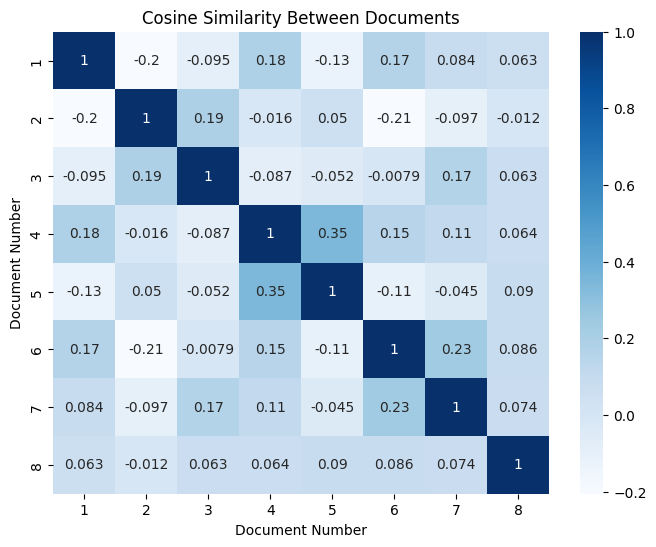

In [ ]:
# for heatmap visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the heatmap for the cosine similarity matrix
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, cmap="Blues", xticklabels=range(1, len(documents)+1), yticklabels=range(1, len(documents)+1))

plt.title('Cosine Similarity Between Documents')
plt.xlabel('Document Number')
plt.ylabel('Document Number')
plt.show()

Conclusion from the heatmap:We can see that the documents are not similar to each other....